In [1]:
import numpy
import os

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
})

In [4]:
import sys
sys.path.append("../scripts/")
import pp_vis

In [5]:
# Colours from https://personal.sron.nl/~pault/
app_colors = {
    "Unportable": "#0077BB",
    "Single Target": "#33BBEE",
    "Multi-Target": "#009988",
    "Consistent (30%)": "#EE7733",
    "Consistent (70%)": "#CC3311",
    "Inconsistent": "#EE3377",
}
plat_order=["OpenMP", "Kokkos", "OpenACC", "CUDA", "OpenCL", "SYCL"]
csv_root="../data/"

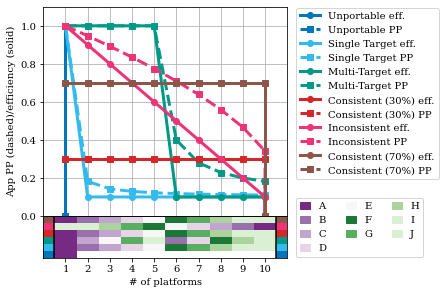

In [6]:
effs_df = pp_vis.app_effs(os.path.join(csv_root, "synthetic.csv"), raw_effs=True)

fig = plt.figure(figsize=(4, 4))
plat_colors = {}
plat_handles = []
synth_plats=effs_df[effs_df.columns[0]]
plat_cmap = mcolors.ListedColormap([
    "#762A83",
    "#9970AB",
    "#C2A5CF",
    "#E7D4E8",
    "#F7F7F7",
    "#1B7837",
    "#5AAE61",
    "#ACD39E",
    "#D9F0D3"
])
for i, p in enumerate(synth_plats):
    plat_colors[p] = plat_cmap(float(i)/(len(synth_plats)-1))
    plat_handles.append(mpatches.Patch(color=plat_colors[p], label=p))

handles = {}
gs = fig.add_gridspec(1,1)
index = [0, 0]
 
pp_vis.plot_cascade(fig, gs, index, effs_df, handles, app_colors=app_colors, plat_colors=plat_colors)

handle_names, handle_lists = zip(*handles.items())
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(1.0,1.0),ncol=1, handlelength=2.0)
fig.legend(handles=plat_handles, loc='lower left', bbox_to_anchor=(1.0,0.1), ncol=3, handlelength=1.0)
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
    
plt.savefig(f"synthetic_cascade.png", dpi = 300 ,bbox_inches="tight")

In [7]:
gpu_handles = []
cpu_handles = []
gpus=['P100','V100','A100','Turing','Radeon VII', 'MI50', 'IrisPro Gen9']
cpus=['Cascade Lake', 'Skylake', 'Knights Landing', 'Rome', 'Power 9', "ThunderX2", 'Graviton 2', 'A64FX']
gpu_cmap = mcolors.ListedColormap([  # Purples
    "#762A83",
    "#9970AB",
    "#C2A5CF",
    "#E7D4E8"
])

cpu_cmap = mcolors.ListedColormap([  # Greens
    "#1B7837",
    "#5AAE61",
    "#ACD39E",
    "#D9F0D3"
])
        
for i, p in enumerate(gpus):
    plat_colors[p] = gpu_cmap(float(i)/(len(gpus)-1))
    gpu_handles.append(mpatches.Patch(color=plat_colors[p], label=f"GPU{i}"))
    print(f"GPU{i}",p)
for i, p in enumerate(cpus):
    plat_colors[p] = cpu_cmap(float(i)/(len(cpus)-1))
    cpu_handles.append(mpatches.Patch(color=plat_colors[p], label=f"CPU{i}"))
    print(f"CPU{i}",p)

GPU0 P100
GPU1 V100
GPU2 A100
GPU3 Turing
GPU4 Radeon VII
GPU5 MI50
GPU6 IrisPro Gen9
CPU0 Cascade Lake
CPU1 Skylake
CPU2 Knights Landing
CPU3 Rome
CPU4 Power 9
CPU5 ThunderX2
CPU6 Graviton 2
CPU7 A64FX


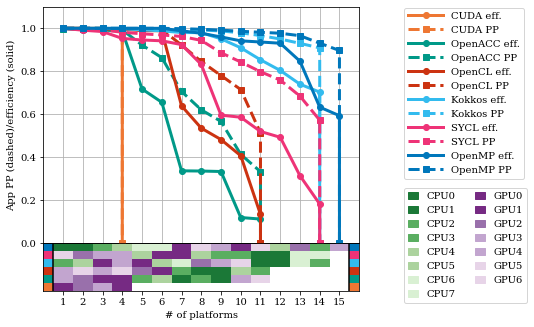

In [17]:
app_colors = {
    "OpenMP": "#0077BB",
    "Kokkos": "#33BBEE",
    "OpenACC": "#009988",
    "CUDA": "#EE7733",
    "OpenCL": "#CC3311",
    "SYCL": "#EE3377",
}

fig = plt.figure(figsize=(5, 5))

handles = {}
gs = fig.add_gridspec(1,1)
for i, appfile in enumerate(["babelstream_2020.csv"]): #, "cloverleaf.csv", "neutral.csv"]):

    col = i-3*(i//3)
    row = i//3 
    index = [row, col]
    
    throughput=(appfile == "babelstream_2020.csv")
    integrate=False
    appname=None
    effs_df = pp_vis.app_effs(os.path.join(csv_root, appfile), raw_effs=False, throughput=throughput)
    plats = effs_df[effs_df.columns[0]]
    
    appname = os.path.splitext(os.path.basename(appfile))[0]
    ax=pp_vis.plot_cascade(fig, gs, index, effs_df, handles, app_colors=app_colors, plat_colors=plat_colors) 
    #ax.set_title('BabelStream Triad array size = 2**25')
handle_names, handle_lists = zip(*handles.items())
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(1.1,1.0),handlelength=3.5, ncol=1)
fig.legend(handles=cpu_handles+gpu_handles, loc='upper left', bbox_to_anchor=(1.1,0.5),handlelength=1.0, ncol=2)

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(bottom=0.2)    
plt.savefig(f"{appname}_cascade.png", dpi=300, bbox_inches="tight")